# Comparing individual matrices

## 0. Libraries

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
import sys

## 1. Import data

In [236]:
# species = sys.argv[1]
# orders = str(sys.argv[2])

species = 'Bsubtilis'
orders = '8'

file_path = 'C:/Users/alibe/Desktop/Project/training_files/XXX/09_XXX_YYY_ZZZ_overall'
file_path = file_path.replace('XXX', species).replace('ZZZ', orders)

path1 = file_path.replace('YYY', species) + '.csv'
path2 = file_path.replace('YYY', 'Ecoli') + '.csv'

matrix1_count = pd.read_csv(path1, index_col = 0)
matrix2_count = pd.read_csv(path2, index_col = 0)

title = species[0] + '. ' + species[1:]

In [237]:
matrix1 = []
matrix2 = []

In [238]:
for i in range(len(matrix1_count)):
    for j in range(len(matrix1_count.columns)):
        matrix1.append(matrix1_count.iloc[i, j] / matrix1_count.to_numpy().sum())
        matrix2.append(matrix2_count.iloc[i, j] / matrix2_count.to_numpy().sum())
    print('\rMatrix completion: {:%}'.format(i / (len(matrix1_count) - 1)), end = '')

Matrix completion: 100.000000%

## 2. Calculate distance

In [239]:
EuD = 0
D_matrix = np.zeros(len(matrix1))

In [240]:
for i in range(len(matrix1)):
    EuD += math.sqrt((matrix1[i] - matrix2[i]) ** 2)
    D_matrix[i] = matrix1[i] - matrix2[i]

## 3. Graph - matrix

In [241]:
AA = list(matrix1_count.columns)
SS = list(matrix1_count.index)
D_matrix.shape = (len(SS), len(AA))

In [242]:
if len(SS) == 9:
    fig_size = (7, 4)
else:
    fig_size = (7, 3)

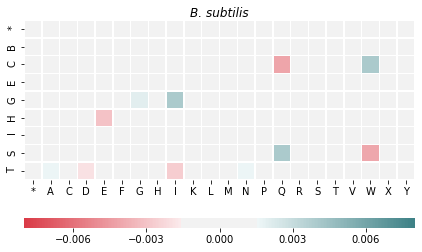

In [243]:
grid_kws = {"height_ratios": (0.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize = fig_size)
ax.set_title(title, va = 'top' , style='italic')
HM = sns.heatmap(D_matrix, linewidth=0.5, center = 0, cmap=sns.diverging_palette(10, 200, sep=50, as_cmap=True),
                vmax = 0.008, vmin = -0.008, xticklabels=AA, yticklabels=SS, square = True,
                ax=ax, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal"})
plt.show()

In [244]:
fig1 = HM.get_figure()

## 5. Output

In [245]:
fig1.savefig(file_path.replace('YYY_', '').replace('09', '10') + '.png')